In [32]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import random

In [33]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    counter: int

In [34]:
def greeter(state: AgentState) -> AgentState:
    """greeting function"""
    state["name"] = f"Hi there {state['name']}!"
    state['counter'] = 0
    state["values"] = []
    return state

def random_values(state: AgentState) -> AgentState:
    """Set random number into values"""
    state["values"].append(random.randint(1, 10))
    state['counter'] += 1
    return state

def conditional_route(state: AgentState) -> str:
    if state['counter'] < 5:
        return "random_values"
    else:
        return "end"

In [35]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeter)
graph.add_node("random_values", random_values)

graph.add_edge("greeter", "random_values")

graph.add_edge(START, "greeter")

graph.add_conditional_edges(
    "random_values",
    conditional_route,
    {
        "random_values": "random_values",
        "end": END
    }
)

app = graph.compile()

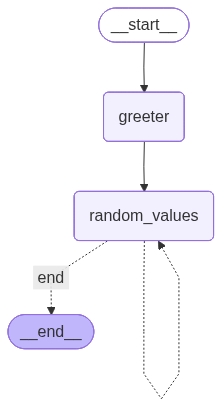

In [36]:
from IPython.display import Image, display
display(Image(app.get_graph(). draw_mermaid_png()))

In [37]:
result = app.invoke({"name": "beast"})

print(result)

{'name': 'Hi there beast!', 'values': [6, 6, 4, 7, 1], 'counter': 5}
